## Test your knowledge - Dementia Dataset

Your training dataset also comes from [kaggle](https://www.kaggle.com/), a platform for data science competitions. The dataset is called [Dementia Prediction](https://www.kaggle.com/datasets/fatemehmehrparvar/dementia). The dataset is used to generate predictions of dementia using the simple MRI score and the amended MRI score. 

## Instructions

Load and examine the Dementia dataset (`data/Dementia.csv`). Based on what we just learned, answer the following questions:

1. **Data Understanding and Cleaning**
    - How many records and features are there in the dataset? Identify the number of numerical and categorical features.
    - Are there any missing values in the dataset? If so, in which columns and how many?
    - For numerical columns with missing values, calculate the mean and median. Decide which measure of central tendency is more appropriate for filling the missing values.
  
2. **Statistical Analysis and Visualization**
    - What is the age distribution of the individuals in the dataset? Plot a histogram of the age feature.
    - How does the number of years of education relate to the dementia_all feature? Plot a boxplot showing the distribution of education years for individuals with and without dementia.
    - Explore the relationship between gender and dementia. Calculate the percentage of individuals with dementia for each gender and create a bar plot.
    -**Bonus:** Investigate the prevalence of diabetes, smoking, hypertension, and hypercholesterolemia in the dataset. Create a bar plot for each condition.
  
3. **Advanced Analysis and Insights**
    - Analyze the relationship between the 'SVD Simple Score' and the 'SVD Amended Score'. Is there a strong correlation between these two scores? Use a scatter plot to visualize the relationship.
    - Compare the distribution of the 'PS' (Processing Speed) scores for different categories of the 'hypercholesterolemia' feature. Use a boxplot to visualize the comparison.
    -**Bonus:** Create a confusion matrix

# Elya Wygoda - 205365901

In [280]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from  scipy import stats
sns.set_style()

In [257]:
dementia_df = pd.read_csv("data/Dementia.csv")

In [258]:
categorical_features = []
numerical_features = []
for col in dementia_df.columns:
    number_of_unique_values = len(dementia_df[col].unique())
    print(col, number_of_unique_values)
    if number_of_unique_values < 10:
        categorical_features.append(col)
    else:
        if col == "ID":
            continue
        numerical_features.append(col)

ID 1467
age 630
gender 2
dementia 3
dementia_all 2
educationyears 26
EF 687
PS 739
Global 1015
diabetes 2
smoking 4
hypertension 2
hypercholesterolemia 2
lacunes_num 2
fazekas_cat 2
study 4
study1 3
SVD Simple Score 5
SVD Amended Score 9
Fazekas 4
lac_count 4
CMB_count 2


In [259]:
dementia_df["SVD Amended Score"].unique()

array([ 7.,  3.,  2.,  4.,  1.,  6.,  5.,  0., nan])

In [260]:
len(dementia_df) # number of records.

1842

In [262]:
len(dementia_df.columns)  # total number of columns

22

In [263]:
print(len(categorical_features), categorical_features)

16 ['gender', 'dementia', 'dementia_all', 'diabetes', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'study1', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count', 'CMB_count']


In [264]:
print(len(numerical_features), numerical_features)

5 ['age', 'educationyears', 'EF', 'PS', 'Global']


In [265]:
missing_val_columns = dementia_df[numerical_features].isnull().sum() # yes, here are the missing values columns
missing_val_columns = missing_val_columns[missing_val_columns > 0]
missing_val_columns = missing_val_columns.index
missing_val_columns

Index(['EF', 'PS', 'Global'], dtype='object')

In [266]:
dementia_df[missing_val_columns].skew()

EF       -1.137989
PS       -0.201314
Global   -0.201934
dtype: float64

<Axes: >

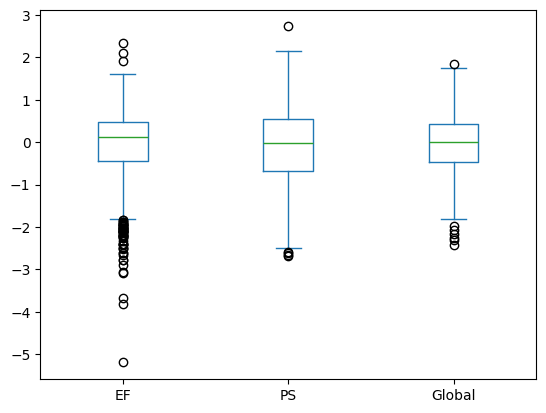

In [267]:
dementia_df[missing_val_columns].plot(kind="box")


In [268]:
# filling mssing values
dementia_df.loc[dementia_df["EF"].isna(),"EF"] = dementia_df["EF"].median()
dementia_df.loc[dementia_df["PS"].isna(),"PS"] = dementia_df["PS"].mean()
dementia_df.loc[dementia_df["Global"].isna(),"Global"] = dementia_df["Global"].mean()

<Axes: ylabel='Frequency'>

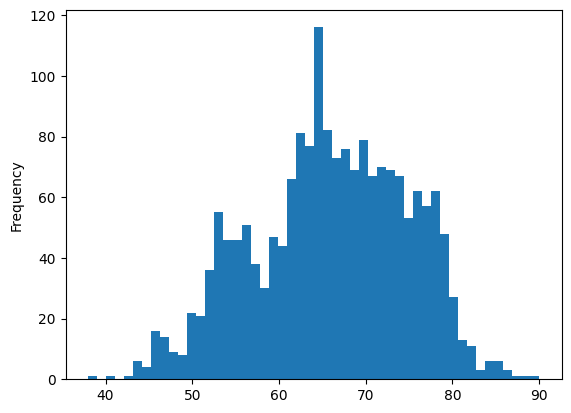

In [270]:
dementia_df["age"].plot(kind="hist", bins=50)

In [271]:
dementia_df = dementia_df[~dementia_df["dementia"].isna()]


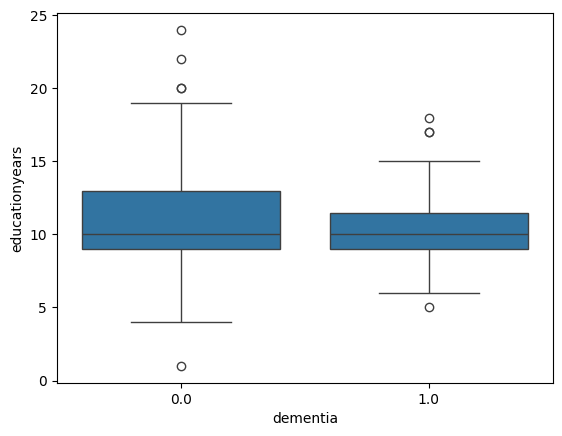

In [273]:
sns.boxplot(data=dementia_df,x="dementia", y="educationyears")
plt.show() # seems like years of education has little to no effect.

In [274]:
only_dementia_df = dementia_df[dementia_df["dementia"]==1.0]

<Axes: xlabel='gender'>

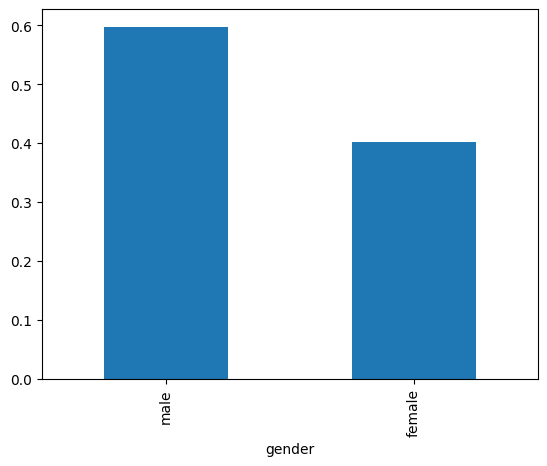

In [275]:
only_dementia_df["gender"].value_counts(normalize=True).plot(kind="bar")

In [286]:
dementia_df = dementia_df.dropna(subset=["SVD Amended Score", "SVD Simple Score"])

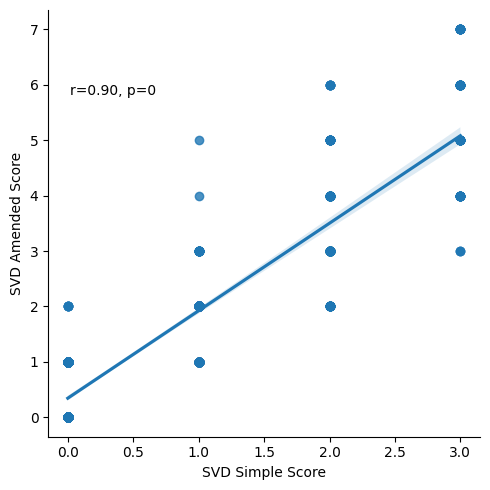

In [289]:
svd_reg = sns.lmplot(data=dementia_df, x="SVD Simple Score", y="SVD Amended Score")

def annotate(data, **kws):
    r, p = stats.pearsonr(data['SVD Simple Score'], data['SVD Amended Score'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
svd_reg.map_dataframe(annotate)
plt.show()

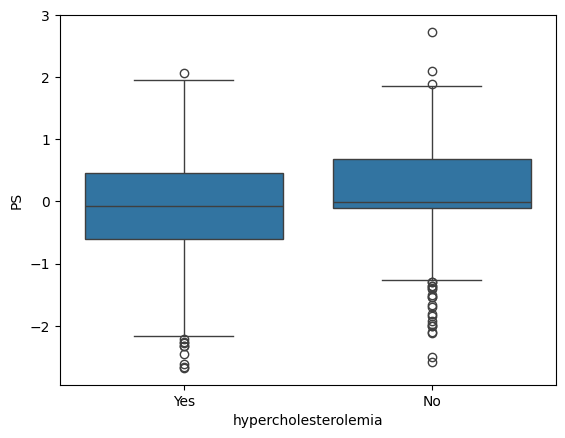

In [288]:
sns.boxplot(data=dementia_df,x="hypercholesterolemia", y="PS")
plt.show() 
# It looks like 'hypercholesterolemia' affects processing speed, those without it seem to have a bit better
# processing speed.